# **PCA**







#Step 1 : import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_wine

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [4]:
# instantiating
wine = load_wine(as_frame=True)
# creating dataframe
df = wine.frame
X=wine.data
y=wine.target


In [5]:
wine.frame.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [6]:
# Split the data into training and testing sets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [7]:
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std
print(Z,X_mean)

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.514341   -0.560668  0.231400          -1.166303   1.908522   
1    0.245597   -0.498009 -0.825667          -2.483841   0.018094   
2    0.196325    0.021172  1.106214          -0.267982   0.088110   
3    1.686791   -0.345835  0.486554          -0.806975   0.928300   
4    0.294868    0.227053  1.835226           0.450674   1.278379   
..        ...         ...       ...                ...        ...   
173  0.873810    2.966176  0.304301           0.300954  -0.331985   
174  0.491955    1.408636  0.413653           1.049555   0.158126   
175  0.331822    1.739837 -0.388260           0.151234   1.418411   
176  0.208643    0.227053  0.012696           0.151234   1.418411   
177  1.391162    1.578712  1.361368           1.498716  -0.261969   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.806722    1.031908             -0.657708         1.221438   
1         0.567048    0.7

In [8]:


sc=StandardScaler()
X_train=sc.fit_transform(X_train)
x_test=sc.transform(x_test)


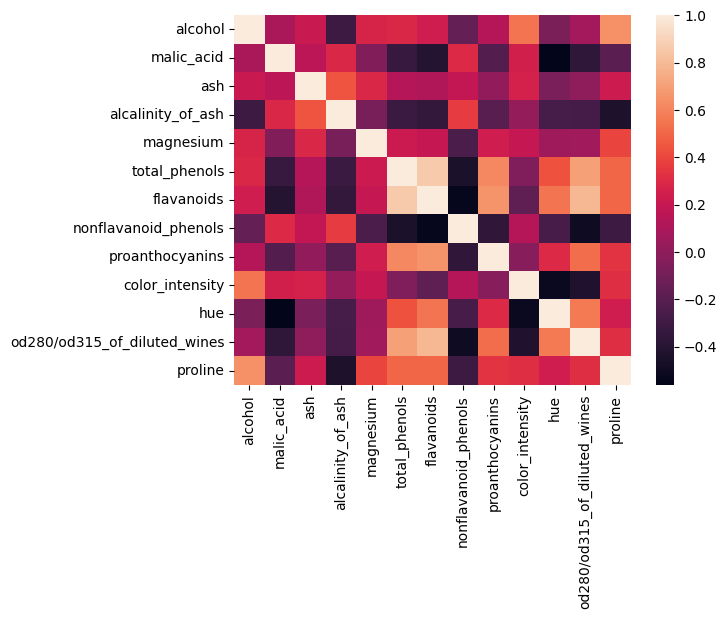

In [9]:
c = Z.cov()
sns.heatmap(c)
plt.show()

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [10]:
pca_pr = PCA(n_components=2)
X_train_pca = pca_pr.fit_transform(X_train)
x_test_pca = pca_pr.transform(x_test)


#Step 6: Fitting Logistic Regression To the training set




In [11]:
Pc_tr=LogisticRegression()
Pc_tr.fit(X_train, y_train)


LogisticRegression()

#Step 7: Predicting the test set result




In [12]:
y_pred = Pc_tr.predict(x_test)
print(y_pred)

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


#Step 8: Making the confusion matrix




In [15]:
cm = confusion_matrix(y_test, y_pred, labels=Pc_tr.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Pc_tr.classes_)



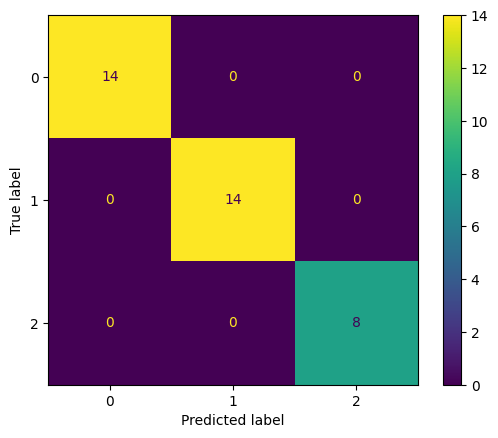

In [17]:
dis.plot()
plt.show()

In [18]:
y_pred_t = Pc_tr.predict(X_train)


#Step 9: Predicting the training set result




#Step 10: Visualizing the Test set results




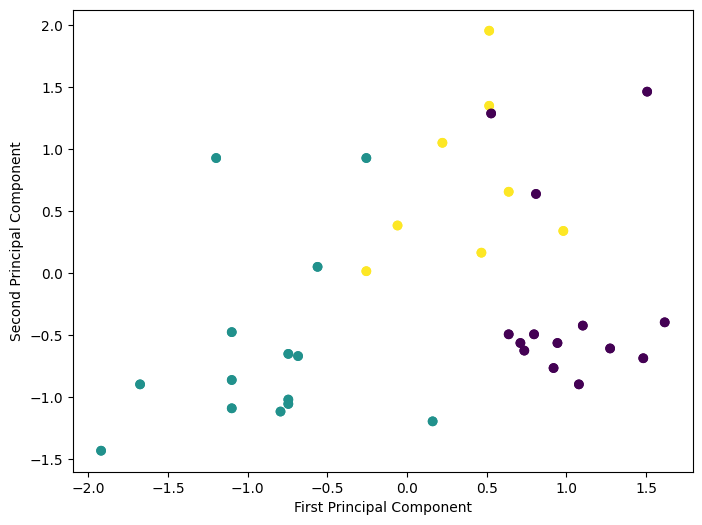

In [24]:
plt.figure(figsize=(8, 6))

plt.scatter(x_test[:, 0],x_test[:, 1],c=y_pred,)
plt.scatter(x_test[:, 0],x_test[:, 1],c=y_pred)


# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


#**Well Done :)**
Now let's practice!